1.Section: Weather Data

Action: Find the description of the ISD on the NCDC’s website, and note the current size of the dataset

Answer: The database includes over 35,000 stations worldwide, with some having data as far back as 1901, though the data show a substantial increase in volume in the 1940s and again in the early 1970s. Currently, there are over 14,000 "active" stations updated daily in the database. The total uncompressed data volume is around 600 gigabytes.

2.Section: Manual ftp access

Action: check that the downloaded files uncompress to plausible-looking data

Answer:

In [14]:

!zcat 029070-99999-1901.gz |tail -1

0035029070999991901123120004+64333+023450FM-12+000599999V0200901N009819999999N0000001N9-00831+99999100711ADDGF108991999999999999999999MW1721


3.Section: Data processing

Action: test your program on the 1901 data: the maximum recorded temperature from your program should be 31.7°C.

Answer:

In [26]:
#to test on 1990 max temp.
# to concatenate all files in 1990 folder into a single zipped file
!cat 1990/*.gz > 1990.gz 

In [28]:
!sh ./max_temperature.sh 1990.gz 

1990	240


In [29]:
#to test on 1990 max temp.
# to concatenate all files in 1901 folder into a single zipped file
!cat 1901/*.gz > 1901.gz 

In [31]:
!sh ./max_temperature.sh 1901.gz

1901	317


The maximum recorded temperature from the written program: 31.7°C.

4.Section: Batch data acquisition

Action: given that each data file is around 20kB in size, calculate how many data files there are in the whole dataset

Answer: Given the whole dataset is approximately 600GB, if each data file is around 20kb in size, there are approximately:
        600 x 10^9 / 20 x 10^3 = 30 x 10^6  files, or 30-million files in the entire data set.

Action : Action: Write a program (in Python or other suitable language: R is not recommended for this task because its FTP support is poor) which takes a single year as argument, and retrieves all the ISD data files from the NOAA’s FTP server for that year. You may wish to think about how to make your program robust to temporary network failures of various kinds

Answer:


In [36]:
!cat download.py























os.system('zcat raw/' + sys.argv[1] + '/*.gz | gzip > ' + sys.argv[1] + '.gz')

Action: test this program by using it to get the ISD data files for the year 1902.

Answer:

In [66]:
!python download.py 1902

Action: test your data processing program by rerunning it on the now-larger dataset; the output from your program should resemble:

1901    317

1902    244

Answer:

In [46]:
!cat ./raw/1902/*.gz > 1902.gz |sh ./max_temperature.sh 1901.gz 1902.gz

1901	317
1902	244


5.Section: Continuing data acquisition

Action_1: use your program to download ISD data from the years 1903 to 1930

Action_2: based on your download time for this step, the volume of data downloaded, and the total archive size, estimate how long it would take to download the entire dataset.

Answer_1 and Answer_2:

In [63]:
import time
start_time = time.time()
!for i in $(seq 1903 1 1930 $END); do python download.py $i; done
print("--- %s seconds ---" % (time.time() - start_time))

--- 275.592523098 seconds ---


In [65]:
import os
folder = 'raw'
folder_size = 0
for (path, dirs, files) in os.walk(folder):
  for file in files:
    filename = os.path.join(path, file)
    folder_size += os.path.getsize(filename)
print "Folder = %0.1f MB" % (folder_size/(1024*1024.0))

Folder = 4.2 MB


Conclusion: 

It took 275s to download files with the size 4.2 MB; if the total size of the files is 600GB, the estimated time for downloading the entire set of files is (600x10^9) / (4.2x10^6)  X 275secs = 39,285,714.3 secs (i.e., 454 days, or 1.24 year)

1.Section: Filesystem setup
    
Action: Run this call for yourselves and check that the results include your own user id with read, write and execute permission

Answer:

In [67]:
!ssh hng001@dsm1 'hadoop fs -getfacl /user/mas01cr/bda/2015-16/ncdc'

# file: /user/mas01cr/bda/2015-16/ncdc
# owner: mas01cr
# group: hadoop
user::rwx
user:aalfa001:rwx
user:acost051:rwx
user:aekub002:rwx
user:akatr002:rwx
user:cbutl002:rwx
user:hng001:rwx
user:kvang001:rwx
user:lchu001:rwx
user:nsihw001:rwx
group::r-x
mask::rwx
other::r-x



2.Section: Directory contents
    
Action: preprocess and copy to the HDFS shared directory all data files you were responsible for downloading.

#prior adding my files, we need to check the files existing in the hadoop directory that we are about to write in:


!ssh hng001@dsm1 'hadoop fs -ls /user/mas01cr/bda/2015-16/ncdc'



Found 30 items
-rw-r--r--   3 mas01cr  hadoop      73862 2016-01-19 12:29 /user/mas01cr/bda/2015-16/ncdc/1901.gz
    
-rw-r--r--   3 mas01cr  hadoop      74100 2016-01-19 12:29 /user/mas01cr/bda/2015-16/ncdc/1902.gz
    
-rw-r--r--   3 mas01cr  hadoop      73070 2016-01-19 12:29 /user/mas01cr/bda/2015-16/ncdc/1903.gz
    
-rw-r--r--   3 mas01cr  hadoop      72668 2016-01-19 12:29 /user/mas01cr/bda/2015-16/ncdc/1904.gz
    
-rw-r--r--   3 mas01cr  hadoop      70477 2016-01-19 12:29 /user/mas01cr/bda/2015-16/ncdc/1905.gz
    
-rw-r--r--   3 mas01cr  hadoop      59820 2016-01-19 12:29 /user/mas01cr/bda/2015-16/ncdc/1906.gz
    
-rw-r--r--   3 mas01cr  hadoop      59652 2016-01-19 12:29 /user/mas01cr/bda/2015-16/ncdc/1907.gz
    
-rw-r--r--   3 mas01cr  hadoop      73325 2016-01-19 12:29 /user/mas01cr/bda/2015-16/ncdc/1908.gz
    
-rw-r--r--   3 mas01cr  hadoop      84115 2016-01-19 12:29 /user/mas01cr/bda/2015-16/ncdc/1909.gz
    
-rw-r--r--   3 kvang001 hadoop   19160490 2016-01-19 13:54 /user/mas01cr/bda/2015-16/ncdc/1940.gz
    
-rw-r--r--   3 kvang001 hadoop   23378838 2016-01-19 13:54 /user/mas01cr/bda/2015-16/ncdc/1941.gz
    
-rw-r--r--   3 kvang001 hadoop   35534830 2016-01-19 13:54 /user/mas01cr/bda/2015-16/ncdc/1942.gz
    
-rw-r--r--   3 kvang001 hadoop   68342469 2016-01-19 13:54 /user/mas01cr/bda/2015-16/ncdc/1943.gz
    
-rw-r--r--   3 kvang001 hadoop   86585441 2016-01-19 13:54 /user/mas01cr/bda/2015-16/ncdc/1944.gz
    
-rw-r--r--   3 kvang001 hadoop  103792763 2016-01-22 13:24 /user/mas01cr/bda/2015-16/ncdc/1945.gz
    
-rw-r--r--   3 kvang001 hadoop   62091064 2016-01-19 13:54 /user/mas01cr/bda/2015-16/ncdc/1946.gz
    
-rw-r--r--   3 kvang001 hadoop   63548631 2016-01-19 13:55 /user/mas01cr/bda/2015-16/ncdc/1947.gz
    
-rw-r--r--   3 kvang001 hadoop  152148791 2016-01-21 16:04 /user/mas01cr/bda/2015-16/ncdc/1948.gz
    
-rw-r--r--   3 kvang001 hadoop  221688461 2016-01-25 11:26 /user/mas01cr/bda/2015-16/ncdc/1949.gz
    
-rw-r--r--   3 aekub002 hadoop  183828924 2016-01-25 09:48 /user/mas01cr/bda/2015-16/ncdc/1965.gz
    
-rw-r--r--   3 aekub002 hadoop  184902412 2016-01-25 09:40 /user/mas01cr/bda/2015-16/ncdc/1966.gz
    
-rw-r--r--   3 aekub002 hadoop  180610103 2016-01-25 09:20 /user/mas01cr/bda/2015-16/ncdc/1967.gz
    
-rw-r--r--   3 aekub002 hadoop  173272848 2016-01-25 08:54 /user/mas01cr/bda/2015-16/ncdc/1968.gz
    
-rw-r--r--   3 aekub002 hadoop  216846965 2016-01-25 08:41 /user/mas01cr/bda/2015-16/ncdc/1969.gz
    
-rw-r--r--   3 aekub002 hadoop  215879069 2016-01-25 08:35 /user/mas01cr/bda/2015-16/ncdc/1970.gz
    
-rw-r--r--   3 akatr002 hadoop  142752543 2016-01-25 00:11 /user/mas01cr/bda/2015-16/ncdc/1971.gz
    
-rw-r--r--   3 akatr002 hadoop   87068301 2016-01-25 00:12 /user/mas01cr/bda/2015-16/ncdc/1972.gz
    
-rw-r--r--   3 akatr002 hadoop  742295169 2016-01-25 00:12 /user/mas01cr/bda/2015-16/ncdc/1973.gz
    
-rw-r--r--   3 akatr002 hadoop  780045876 2016-01-25 00:13 /user/mas01cr/bda/2015-16/ncdc/1974.gz
    
-rw-r--r--   3 akatr002 hadoop  815309690 2016-01-25 20:41 /user/mas01cr/bda/2015-16/ncdc/1975.gz

In [68]:
#to add 1910.gz to 1919.gz using '*' wildcard function
!ssh hng001@dsm1 'hadoop fs -copyFromLocal 191*.gz /user/mas01cr/bda/2015-16/ncdc'

copyFromLocal: `/user/mas01cr/bda/2015-16/ncdc/1910.gz': File exists
copyFromLocal: `/user/mas01cr/bda/2015-16/ncdc/1911.gz': File exists
copyFromLocal: `/user/mas01cr/bda/2015-16/ncdc/1912.gz': File exists
copyFromLocal: `/user/mas01cr/bda/2015-16/ncdc/1913.gz': File exists
copyFromLocal: `/user/mas01cr/bda/2015-16/ncdc/1914.gz': File exists
copyFromLocal: `/user/mas01cr/bda/2015-16/ncdc/1915.gz': File exists
copyFromLocal: `/user/mas01cr/bda/2015-16/ncdc/1916.gz': File exists
copyFromLocal: `/user/mas01cr/bda/2015-16/ncdc/1917.gz': File exists
copyFromLocal: `/user/mas01cr/bda/2015-16/ncdc/1918.gz': File exists
copyFromLocal: `/user/mas01cr/bda/2015-16/ncdc/1919.gz': File exists


In [4]:
#to add 1920.gz to 1929.gz using '*' wildcard function
!ssh hng001@dsm1 'hadoop fs -copyFromLocal 192*.gz /user/mas01cr/bda/2015-16/ncdc'
# files 1930.gz to 1939.gz were also subsequently added using the same fucntion to hadoop-fs.
# Files uploaded by me: Year 1910-1939.

In [6]:
#to check if the inteded files have been successfully added into the designated hadoop directory
!ssh hng001@dsm1 'hadoop fs -ls /user/mas01cr/bda/2015-16/ncdc'

Found 66 items
-rw-r--r--   3 mas01cr  hadoop      73862 2016-01-19 12:29 /user/mas01cr/bda/2015-16/ncdc/1901.gz
-rw-r--r--   3 mas01cr  hadoop      74100 2016-01-19 12:29 /user/mas01cr/bda/2015-16/ncdc/1902.gz
-rw-r--r--   3 mas01cr  hadoop      73070 2016-01-19 12:29 /user/mas01cr/bda/2015-16/ncdc/1903.gz
-rw-r--r--   3 mas01cr  hadoop      72668 2016-01-19 12:29 /user/mas01cr/bda/2015-16/ncdc/1904.gz
-rw-r--r--   3 mas01cr  hadoop      70477 2016-01-19 12:29 /user/mas01cr/bda/2015-16/ncdc/1905.gz
-rw-r--r--   3 mas01cr  hadoop      59820 2016-01-19 12:29 /user/mas01cr/bda/2015-16/ncdc/1906.gz
-rw-r--r--   3 mas01cr  hadoop      59652 2016-01-19 12:29 /user/mas01cr/bda/2015-16/ncdc/1907.gz
-rw-r--r--   3 mas01cr  hadoop      73325 2016-01-19 12:29 /user/mas01cr/bda/2015-16/ncdc/1908.gz
-rw-r--r--   3 mas01cr  hadoop      84115 2016-01-19 12:29 /user/mas01cr/bda/2015-16/ncdc/1909.gz
-rw-r--r--   3 hng001   hadoop      84192 2016-02-08 19:17 /user/mas01cr/bda/2015-16/ncdc/1910.gz
-rw-r

3.Mapper and Reducer

Action: write the following programs (mapper and reducer programs) as specified

Answer: 

In [71]:
!ssh hng001@dsm1 'cat ./bigdata/max_temperature_map.py'

#!/usr/bin/env python

import re
import sys

for line in sys.stdin:
  val = line.strip()
  (year, temp, q) = (val[15:19], val[87:92], val[92:93])
  if (temp != "+9999" and re.match("[01459]", q)):
    print "%s\t%s" % (year, temp)


In [72]:
!ssh hng001@dsm1 'cat ./bigdata/max_temperature_reduce.py'

#!/usr/bin/env python

import sys

(last_key, max_val) = (None, -sys.maxint)
for line in sys.stdin:
  (key, val) = line.strip().split("\t")
  if last_key and last_key != key:
    print "%s\t%s" % (last_key, max_val)
    (last_key, max_val) = (key, int(val))
  else:
    (last_key, max_val) = (key, max(max_val, int(val)))

if last_key:
  print "%s\t%s" % (last_key, max_val)

Action: test your programs on subsets of the ISD data verify that the answers that you get are those that are expected(check that they are the same as from last week’s lab, for example)

Answer:

In [73]:
!ssh hng001@dsm1 'zcat ./bigdata/1901.gz | \
python ./bigdata/max_temperature_map.py | \
sort | python ./bigdata/max_temperature_reduce.py'

1901	317


Ssh to dsm1 is done because the python 2 is used in here, whereas python 3 is used in Igor.
The resultant max temeperature found is consistent with the result found in labsheet 01b:

1901 317


Action: Test on progressively bigger and bigger subsets, and record how long it takes for each subproblem in a table, along with the size of the subproblem (measured in bytes, or number of ISD record lines).

Answer:

In [ ]:
#to show how time is recorded for processing each data from each year
!ssh dsm1 'for i in $(seq 1901 1 1930 $END); do time zcat $i.gz | \
python ./bigdata/max_temperature_map.py | \
sort | python ./bigdata/max_temperature_reduce.py ; done' 

Results:
1901	317

real	0m0.062s

user	0m0.067s

sys	0m0.008s

1902	244

real	0m0.060s

user	0m0.066s

sys	0m0.005s

1903	289

real	0m0.060s

user	0m0.067s

sys	0m0.005s

... and etc

In [ ]:
#This is how time is measured for pipeline job to extract each year's max temperature.

!ssh dsm1 'for i in $(seq 1901 1 1970 $END); do time zcat /home/mas01cr/ncdc/$i.gz | \
python ./bigdata/max_temperature_map.py | \
sort | python ./bigdata/max_temperature_reduce.py ; done' 

#Since a quick inspection of the data, after getting the time data from running the hadoop job for each year data,
#tells us that time taken for hadoop is already faster than that of pipepline method starting
#from 1940's, because the file size gets bigger. Hence, for simplicity, the time data are only used up to the year of 1946,
#for both hadoop and pipepline method for extracting maximum temperature.
#Then the results are saved in a tsv file called time.tsv

In [25]:
#In this case, we use sys-time for comparing pipeline and hadoop performance
!cat time.tsv |grep sys

sys	0m0.006s
sys	0m0.004s
sys	0m0.005s
sys	0m0.002s
sys	0m0.004s
sys	0m0.005s
sys	0m0.007s
sys	0m0.005s
sys	0m0.006s
sys	0m0.004s
sys	0m0.005s
sys	0m0.002s
sys	0m0.005s
sys	0m0.007s
sys	0m0.007s
sys	0m0.006s
sys	0m0.006s
sys	0m0.003s
sys	0m0.010s
sys	0m0.007s
sys	0m0.002s
sys	0m0.004s
sys	0m0.004s
sys	0m0.012s
sys	0m0.005s
sys	0m0.006s
sys	0m0.003s
sys	0m0.006s
sys	0m0.005s
sys	0m0.019s
sys	0m0.023s
sys	0m0.042s
sys	0m0.048s
sys	0m0.050s
sys	0m0.067s
sys	0m0.089s
sys	0m0.112s
sys	0m0.087s
sys	0m0.090s
sys	0m0.097s
sys	0m0.150s
sys	0m0.230s
sys	0m0.411s
sys	0m0.551s
sys	0m0.647s
sys	0m0.411s


In [26]:
# all sys-time details are saved in time1.tsv
!cat time.tsv |grep sys > time1.tsv

In [27]:
#this is to show the size of each year file
!ssh dsm1 'ls -sh /home/mas01cr/ncdc/19**.gz | grep .gz'


 76K /home/mas01cr/ncdc/1901.gz
 76K /home/mas01cr/ncdc/1902.gz
 72K /home/mas01cr/ncdc/1903.gz
 72K /home/mas01cr/ncdc/1904.gz
 72K /home/mas01cr/ncdc/1905.gz
 60K /home/mas01cr/ncdc/1906.gz
 60K /home/mas01cr/ncdc/1907.gz
 72K /home/mas01cr/ncdc/1908.gz
 84K /home/mas01cr/ncdc/1909.gz
 84K /home/mas01cr/ncdc/1910.gz
 88K /home/mas01cr/ncdc/1911.gz
 88K /home/mas01cr/ncdc/1912.gz
100K /home/mas01cr/ncdc/1913.gz
100K /home/mas01cr/ncdc/1914.gz
104K /home/mas01cr/ncdc/1915.gz
 28K /home/mas01cr/ncdc/1916.gz
104K /home/mas01cr/ncdc/1917.gz
100K /home/mas01cr/ncdc/1918.gz
 92K /home/mas01cr/ncdc/1919.gz
100K /home/mas01cr/ncdc/1920.gz
100K /home/mas01cr/ncdc/1921.gz
100K /home/mas01cr/ncdc/1922.gz
 88K /home/mas01cr/ncdc/1923.gz
 84K /home/mas01cr/ncdc/1924.gz
 88K /home/mas01cr/ncdc/1925.gz
144K /home/mas01cr/ncdc/1926.gz
 84K /home/mas01cr/ncdc/1927.gz
148K /home/mas01cr/ncdc/1928.gz
620K /home/mas01cr/ncdc/1929.gz
1.7M /home/mas01cr/ncdc/1930.gz
4.8M /home/mas01cr/ncdc/1931.gz
7.9M /ho

In [34]:
#to show the size of each file and save the details in a file called size.tsv
!ls -sh 19**.gz | grep .gz > ./size.tsv


In [71]:
!cat time1.tsv #denominated in seconds

sys	0.006
sys	0.004
sys	0.005
sys	0.002
sys	0.004
sys	0.005
sys	0.007
sys	0.005
sys	0.006
sys	0.004
sys	0.005
sys	0.002
sys	0.005
sys	0.007
sys	0.007
sys	0.006
sys	0.006
sys	0.003
sys	0.010
sys	0.007
sys	0.002
sys	0.004
sys	0.004
sys	0.012
sys	0.005
sys	0.006
sys	0.003
sys	0.006
sys	0.005
sys	0.019
sys	0.023
sys	0.042
sys	0.048
sys	0.050
sys	0.067
sys	0.089
sys	0.112
sys	0.087
sys	0.090
sys	0.097
sys	0.150
sys	0.230
sys	0.411
sys	0.551
sys	0.647
sys	0.411


In [72]:
!cat size.tsv # denominated in KB

76	1901	
76	1902	
72	1903	
72	1904	
72	1905	
60	1906	
60	1907	
72	1908	
84	1909	
84	1910	
88	1911	
88	1912	
100	1913	
100	1914	
104	1915	
28	1916	
104	1917	
100	1918	
92	1919	
100	1920	
100	1921	
100	1922	
88	1923	
84	1924	
88	1925	
144	1926	
84	1927	
148	1928	
620	1929	
1700	1930	
4800	1931	
7900	1932	
8300	1933	
9400	1934	
12000	1935	
14000	1936	
17000	1937	
15000	1938	
15000	1939	
19000	1940	
23000	1941	
34000	1942	
66000	1943	
83000	1944	
99000	1945	
60000	1946	

In [ ]:
##re-run, 1700M should be 1700K

In [129]:
import csv
import matplotlib.pyplot as plt
import pandas
from pandas import DataFrame
df = pandas.read_csv('size.tsv', sep='\s',  names = ["Size/KB", "Year"])
df1 = pandas.read_csv('time1.tsv', sep='\t',  names = ["time type", "pipeline time record per sec"])

/opt/rh/python27/root/usr/lib/python2.7/site-packages/ipykernel/__main__.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators; you can avoid this warning by specifying engine='python'.


In [130]:
df

,Size/KB,Year
0,76,1901
1,76,1902
2,72,1903
3,72,1904
4,72,1905
5,60,1906
6,60,1907
7,72,1908
8,84,1909
9,84,1910


In [131]:
df1

,time type,pipeline time record per sec
0,sys,0.006
1,sys,0.004
2,sys,0.005
3,sys,0.002
4,sys,0.004
5,sys,0.005
6,sys,0.007
7,sys,0.005
8,sys,0.006
9,sys,0.004


In [132]:
frames = [df, df1]
DF = pandas.concat(frames, axis=2)
DF

,Size/KB,Year,time type,pipeline time record per sec
0,76,1901,sys,0.006
1,76,1902,sys,0.004
2,72,1903,sys,0.005
3,72,1904,sys,0.002
4,72,1905,sys,0.004
5,60,1906,sys,0.005
6,60,1907,sys,0.007
7,72,1908,sys,0.005
8,84,1909,sys,0.006
9,84,1910,sys,0.004


In [149]:

DF_NEW = DF.drop(DF.columns[[1, 2]], axis=1)
DF_NEW

,Size/KB,pipeline time record per sec
0,76,0.006
1,76,0.004
2,72,0.005
3,72,0.002
4,72,0.004
5,60,0.005
6,60,0.007
7,72,0.005
8,84,0.006
9,84,0.004


In [ ]:
#this is how time extraction of each hadoop job for each file in each year is done
# this is for year 1901-1930, while 1931-1970 is done in the part shown next.
!ssh dsm1 'for i in $(seq 1901 1 1930 $END); do time hadoop jar /usr/local/hadoop-2.6.0/share/hadoop/tools/lib/hadoop-streaming-2.6.0.jar \
-file max_temperature_map.py -mapper "python max_temperature_map.py" \
-file max_temperature_reduce.py -reducer "python max_temperature_reduce.py" \
-input /user/mas01cr/bda/2015-16/ncdc/$i.gz \
-output max_temp$i; done' 


#Results:
16/02/19 07:53:49 WARN streaming.StreamJob: -file option is deprecated, please use generic option -files instead.
packageJobJar: [max_temperature_map.py, max_temperature_reduce.py, /tmp/hadoop-unjar7874207274160890281/] [] /tmp/streamjob7990473391623512467.jar tmpDir=null
16/02/19 07:53:50 INFO client.RMProxy: Connecting to ResourceManager at dsm1/158.223.50.51:8032
16/02/19 07:53:50 INFO client.RMProxy: Connecting to ResourceManager at dsm1/158.223.50.51:8032
16/02/19 07:53:51 INFO mapred.FileInputFormat: Total input paths to process : 1
16/02/19 07:53:51 INFO mapreduce.JobSubmitter: number of splits:1
16/02/19 07:53:51 INFO mapreduce.JobSubmitter: Submitting tokens for job: job_1452790691884_0392
16/02/19 07:53:51 INFO impl.YarnClientImpl: Submitted application application_1452790691884_0392
16/02/19 07:53:52 INFO mapreduce.Job: The url to track the job: http://dsm1:8088/proxy/application_1452790691884_0392/
16/02/19 07:53:52 INFO mapreduce.Job: Running job: job_1452790691884_0392
16/02/19 07:53:56 INFO mapreduce.Job: Job job_1452790691884_0392 running in uber mode : false
16/02/19 07:53:56 INFO mapreduce.Job:  map 0% reduce 0%
16/02/19 07:54:01 INFO mapreduce.Job:  map 100% reduce 0%
16/02/19 07:54:06 INFO mapreduce.Job:  map 100% reduce 100%
16/02/19 07:54:06 INFO mapreduce.Job: Job job_1452790691884_0392 completed successfully
16/02/19 07:54:06 INFO mapreduce.Job: Counters: 49
	File System Counters
		FILE: Number of bytes read=85338
		FILE: Number of bytes written=388163
		FILE: Number of read operations=0
		FILE: Number of large read operations=0
		FILE: Number of write operations=0
		HDFS: Number of bytes read=73968
		HDFS: Number of bytes written=9
		HDFS: Number of read operations=6
		HDFS: Number of large read operations=0
		HDFS: Number of write operations=2
	Job Counters 
		Launched map tasks=1
		Launched reduce tasks=1
		Rack-local map tasks=1
		Total time spent by all maps in occupied slots (ms)=2434
		Total time spent by all reduces in occupied slots (ms)=2704
		Total time spent by all map tasks (ms)=2434
		Total time spent by all reduce tasks (ms)=2704
		Total vcore-seconds taken by all map tasks=2434
		Total vcore-seconds taken by all reduce tasks=2704
		Total megabyte-seconds taken by all map tasks=2492416
		Total megabyte-seconds taken by all reduce tasks=2768896
	Map-Reduce Framework
		Map input records=6565
		Map output records=6564
		Map output bytes=72204
		Map output materialized bytes=85338
		Input split bytes=106
		Combine input records=0
		Combine output records=0
		Reduce input groups=1
		Reduce shuffle bytes=85338
		Reduce input records=6564
		Reduce output records=1
		Spilled Records=13128
		Shuffled Maps =1
		Failed Shuffles=0
		Merged Map outputs=1
		GC time elapsed (ms)=33
		CPU time spent (ms)=2150
		Physical memory (bytes) snapshot=435269632
		Virtual memory (bytes) snapshot=1998135296
		Total committed heap usage (bytes)=402653184
	Shuffle Errors
		BAD_ID=0
		CONNECTION=0
		IO_ERROR=0
		WRONG_LENGTH=0
		WRONG_MAP=0
		WRONG_REDUCE=0
	File Input Format Counters 
		Bytes Read=73862
	File Output Format Counters 
		Bytes Written=9
16/02/19 07:54:06 INFO streaming.StreamJob: Output directory: max_temp1901


real	0m17.527s
user	0m3.795s
sys	0m0.171s


--

--the contents in between are removed, to show just the small representation of the overall results.

--


16/02/19 08:04:39 WARN streaming.StreamJob: -file option is deprecated, please use generic option -files instead.
packageJobJar: [max_temperature_map.py, max_temperature_reduce.py, /tmp/hadoop-unjar3483367802533292040/] [] /tmp/streamjob787138577445930652.jar tmpDir=null
16/02/19 08:04:40 INFO client.RMProxy: Connecting to ResourceManager at dsm1/158.223.50.51:8032
16/02/19 08:04:40 INFO client.RMProxy: Connecting to ResourceManager at dsm1/158.223.50.51:8032
16/02/19 08:04:41 INFO mapred.FileInputFormat: Total input paths to process : 1
16/02/19 08:04:41 INFO mapreduce.JobSubmitter: number of splits:1
16/02/19 08:04:42 INFO mapreduce.JobSubmitter: Submitting tokens for job: job_1452790691884_0421
16/02/19 08:04:42 INFO impl.YarnClientImpl: Submitted application application_1452790691884_0421
16/02/19 08:04:42 INFO mapreduce.Job: The url to track the job: http://dsm1:8088/proxy/application_1452790691884_0421/
16/02/19 08:04:42 INFO mapreduce.Job: Running job: job_1452790691884_0421
16/02/19 08:04:46 INFO mapreduce.Job: Job job_1452790691884_0421 running in uber mode : false
16/02/19 08:04:46 INFO mapreduce.Job:  map 0% reduce 0%
16/02/19 08:04:51 INFO mapreduce.Job:  map 100% reduce 0%
16/02/19 08:04:57 INFO mapreduce.Job:  map 100% reduce 100%
16/02/19 08:04:58 INFO mapreduce.Job: Job job_1452790691884_0421 completed successfully
16/02/19 08:04:58 INFO mapreduce.Job: Counters: 49
	File System Counters
		FILE: Number of bytes read=1112546
		FILE: Number of bytes written=2442577
		FILE: Number of read operations=0
		FILE: Number of large read operations=0
		FILE: Number of write operations=0
		HDFS: Number of bytes read=1747054
		HDFS: Number of bytes written=9
		HDFS: Number of read operations=6
		HDFS: Number of large read operations=0
		HDFS: Number of write operations=2
	Job Counters 
		Launched map tasks=1
		Launched reduce tasks=1
		Rack-local map tasks=1
		Total time spent by all maps in occupied slots (ms)=2844
		Total time spent by all reduces in occupied slots (ms)=4040
		Total time spent by all map tasks (ms)=2844
		Total time spent by all reduce tasks (ms)=4040
		Total vcore-seconds taken by all map tasks=2844
		Total vcore-seconds taken by all reduce tasks=4040
		Total megabyte-seconds taken by all map tasks=2912256
		Total megabyte-seconds taken by all reduce tasks=4136960
	Map-Reduce Framework
		Map input records=89262
		Map output records=85580
		Map output bytes=941380
		Map output materialized bytes=1112546
		Input split bytes=106
		Combine input records=0
		Combine output records=0
		Reduce input groups=1
		Reduce shuffle bytes=1112546
		Reduce input records=85580
		Reduce output records=1
		Spilled Records=171160
		Shuffled Maps =1
		Failed Shuffles=0
		Merged Map outputs=1
		GC time elapsed (ms)=45
		CPU time spent (ms)=3760
		Physical memory (bytes) snapshot=444321792
		Virtual memory (bytes) snapshot=2024599552
		Total committed heap usage (bytes)=402653184
	Shuffle Errors
		BAD_ID=0
		CONNECTION=0
		IO_ERROR=0
		WRONG_LENGTH=0
		WRONG_MAP=0
		WRONG_REDUCE=0
	File Input Format Counters 
		Bytes Read=1746948
	File Output Format Counters 
		Bytes Written=9
16/02/19 08:04:58 INFO streaming.StreamJob: Output directory: max_temp1930


real	0m19.420s
user	0m3.776s
sys	0m0.154s'

In [ ]:
#this is how time extraction of each hadoop job for each file in each year is done
# this is done for year 1931-1970
!ssh dsm1 'for i in $(seq 1931 1 1970 $END); do time hadoop jar /usr/local/hadoop-2.6.0/share/hadoop/tools/lib/hadoop-streaming-2.6.0.jar \
-file max_temperature_map.py -mapper "python max_temperature_map.py" \
-file max_temperature_reduce.py -reducer "python max_temperature_reduce.py" \
-input /user/mas01cr/bda/2015-16/ncdc/$i.gz \
-output max_temp$i; done'
#the results are saved in a file called max_temp_time.tsv

In [45]:
!cat max_temp_time.tsv |grep sys > time2.tsv

In [78]:
!cat time2.tsv # denominated in seconds

sys	0.171
sys	0.156
sys	0.165
sys	0.145
sys	0.147
sys	0.122
sys	0.133
sys	0.163
sys	0.148
sys	0.167
sys	0.159
sys	0.160
sys	0.142
sys	0.160
sys	0.135
sys	0.142
sys	0.162
sys	0.156
sys	0.155
sys	0.142
sys	0.161
sys	0.150
sys	0.147
sys	0.149
sys	0.158
sys	0.145
sys	0.175
sys	0.150
sys	0.147
sys	0.154
sys	0.169
sys	0.158
sys	0.157
sys	0.144
sys	0.120
sys	0.144
sys	0.164
sys	0.128
sys	0.133
sys	0.147
sys	0.139
sys	0.143
sys	0.156
sys	0.156
sys	0.157
sys	0.138


In [137]:
import csv
import matplotlib.pyplot as plt
import pandas
from pandas import DataFrame
df2 = pandas.read_csv('time2.tsv', sep='\t',  names = ["time type", "hadoop time record per sec"])

In [138]:
df2

,time type,hadoop time record per sec
0,sys,0.171
1,sys,0.156
2,sys,0.165
3,sys,0.145
4,sys,0.147
5,sys,0.122
6,sys,0.133
7,sys,0.163
8,sys,0.148
9,sys,0.167


In [147]:
df2_NEW = df2.drop(df2.columns[[0]], axis=1) # to drop the first column
df2_NEW
df2_NEW.sort(['hadoop time record per sec'], ascending=[False]) 
#to sort in descending order for comparison with the pipeline time data later


/opt/rh/python27/root/usr/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


,hadoop time record per sec
26,0.175
0,0.171
30,0.169
9,0.167
2,0.165
36,0.164
7,0.163
16,0.162
20,0.161
13,0.160


In [148]:
frames = [DF_NEW, df2_NEW]
dfnew = pandas.concat(frames, axis=2)
dfnew


,Size/KB,pipeline time record per sec,hadoop time record per sec
0,76,0.006,0.171
1,76,0.004,0.156
2,72,0.005,0.165
3,72,0.002,0.145
4,72,0.004,0.147
5,60,0.005,0.122
6,60,0.007,0.133
7,72,0.005,0.163
8,84,0.006,0.148
9,84,0.004,0.167


Observation:
From the observation from the table plotted above, Hadoop starts to perform faster in terms of system time compared to pipeline method, when the size of the file reaches around 23000K.

In [82]:
 dfnew = dfnew.convert_objects(convert_numeric=True) # to convert all numeric contents to numeric/float contents

/opt/rh/python27/root/usr/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


In [83]:
dfnew.dtypes

Size/KB                           int64
Year                              int64
time type                        object
pipeline time record per sec    float64
time type                        object
hadoop time record per sec      float64
dtype: object

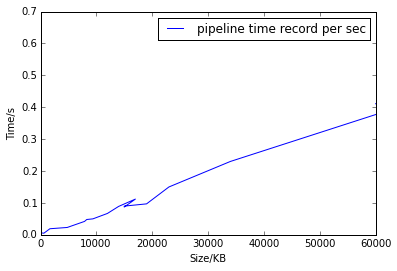

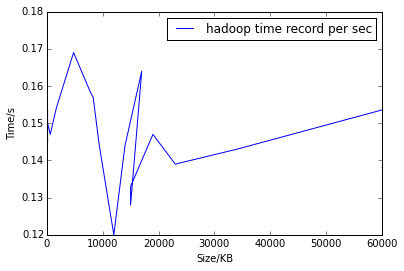

In [112]:
%matplotlib inline
a = dfnew.plot(x='Size/KB', y='pipeline time record per sec')
a.set_ylabel("Time/s")
b = dfnew.plot(x='Size/KB', y='hadoop time record per sec')
b.set_ylabel("Time/s")

The graphs above are plotted to show the difference in processing time using hadoop and pipeline.

In order to find the minimum temperature, a different reducer is used:


In [114]:
!ssh dsm1 'cat min_temp.py'
















	print "%s\t%s" % (year, mintemp)

In [7]:
!ssh dsm1 'zcat ./*.gz | \
python ./bigdata/max_temperature_map.py | \
sort | python min_temp.py '
#to show the minumum temperature of years 1901-1930

1901	-333
1902	-328
1903	-306
1904	-294
1905	-328
1906	-250
1907	-350
1908	-378
1909	-378
1910	-372
1911	-378
1912	-411
1913	-372
1914	-378
1915	-411
1916	-289
1917	-478
1918	-450
1919	-428
1920	-344
1921	-417
1922	-400
1923	-394
1924	-456
1925	-378
1926	-422
1927	-400
1928	-239
1929	-400
1930	-311


To show the mean temperature, a different reducer is used:

In [115]:
!ssh dsm1 'cat mean_temp.py'

















	print "%s\t%s" % (year, float(sumtemp)/float(count))

In [8]:
!ssh dsm1 'zcat ./*.gz | \
python ./bigdata/max_temperature_map.py | \
sort | python mean_temp.py '
#to show the mean temperature of years 1901-1930

1901	46.6985070079
1902	21.6595582635
1903	48.2417447397
1904	33.3222424795
1905	43.3322664228
1906	47.0834855681
1907	31.7641457608
1908	28.8365735115
1909	26.5653039554
1910	35.5586657946
1911	30.7190451207
1912	16.8011452369
1913	29.9587864911
1914	29.8179322964
1915	5.09854807363
1916	21.4239378712
1917	22.9168572736
1918	31.3651984511
1919	27.6051496536
1920	43.5086678301
1921	34.1348160037
1922	27.045145687
1923	26.7924774716
1924	38.2893661879
1925	37.905813194
1926	38.200331934
1927	75.8043972707
1928	75.8293544286
1929	94.6879694421
1930	109.435569058


To show the median temperature, a different reducer is used:

In [116]:
!ssh dsm1 'cat median_temp.py'




























	print "%s\t%s" % (current_year, temp)

In [9]:
!ssh dsm1 'zcat ./*.gz | \
python ./bigdata/max_temperature_map.py | \
sort | python median_temp.py '
#to show the median temperature of years 1901-1930

1901	44
1902	22
1903	33
1904	33
1905	33
1906	33
1907	33
1908	22
1909	22
1910	28
1911	22
1912	17
1913	28
1914	28
1915	17
1916	22
1917	28
1918	39
1919	22
1920	39
1921	33
1922	28
1923	33
1924	39
1925	28
1926	44
1927	78
1928	72
1929	94
1930	106


In [6]:
!ssh hng001@dsm1 'zcat ./*.gz | \
python ./bigdata/max_temperature_map.py | \
sort | python ./bigdata/max_temperature_reduce.py'
#to show the maximum temperature of years 1901-1930

1901	317
1902	244
1903	289
1904	256
1905	283
1906	294
1907	283
1908	289
1909	278
1910	294
1911	306
1912	322
1913	300
1914	333
1915	294
1916	278
1917	317
1918	322
1919	378
1920	294
1921	283
1922	278
1923	294
1924	294
1925	317
1926	489
1927	489
1928	378
1929	328
1930	400


In [4]:
!ssh hng001@dsm1 'hadoop jar /usr/local/hadoop-2.6.0/share/hadoop/tools/lib/hadoop-streaming-2.6.0.jar \
-file max_temperature_map.py -mapper "python max_temperature_map.py" \
-file max_temperature_reduce.py -reducer "python max_temperature_reduce.py" \
-input /user/mas01cr/bda/2015-16/ncdc/19**.gz \
-output output2'
#this is the maximum temperature of all years in the ncdc folder

16/02/19 06:54:11 WARN streaming.StreamJob: -file option is deprecated, please use generic option -files instead.
packageJobJar: [max_temperature_map.py, max_temperature_reduce.py, /tmp/hadoop-unjar1811126557073289260/] [] /tmp/streamjob752778034416763872.jar tmpDir=null
16/02/19 06:54:12 INFO client.RMProxy: Connecting to ResourceManager at dsm1/158.223.50.51:8032
16/02/19 06:54:12 INFO client.RMProxy: Connecting to ResourceManager at dsm1/158.223.50.51:8032
16/02/19 06:54:13 INFO mapred.FileInputFormat: Total input paths to process : 66
16/02/19 06:54:13 INFO net.NetworkTopology: Adding a new node: /default-rack/158.223.50.51:50010
16/02/19 06:54:13 INFO net.NetworkTopology: Adding a new node: /default-rack/158.223.50.56:50010
16/02/19 06:54:13 INFO net.NetworkTopology: Adding a new node: /default-rack/158.223.50.52:50010
16/02/19 06:54:13 INFO net.NetworkTopology: Adding a new node: /default-rack/158.223.50.57:50010
16/02/19 06:54:13 INFO net.NetworkTopology: Adding a new node: /def

In [117]:
!ssh dsm1 'hadoop fs -cat output2/part-00000' 
#maximum temperature of 1901-1975

1901	317
1902	244
1903	289
1904	256
1905	283
1906	294
1907	283
1908	289
1909	278
1910	294
1911	306
1912	322
1913	300
1914	333
1915	294
1916	278
1917	317
1918	322
1919	378
1920	294
1921	283
1922	278
1923	294
1924	294
1925	317
1926	489
1927	489
1928	378
1929	328
1930	400
1931	461
1932	489
1933	489
1934	478
1935	478
1936	550
1937	489
1938	489
1939	489
1940	489
1941	462
1942	479
1943	485
1944	507
1945	496
1946	494
1947	490
1948	601
1949	511
1951	511
1952	544
1953	506
1954	506
1955	489
1965	489
1966	506
1967	489
1968	489
1969	474
1970	489
1971	478
1972	483
1973	580
1974	560
1975	561


In [5]:
!ssh dsm1 'hadoop fs -cat output2/part-00000' > ./max_temp.tsv

In [119]:
import csv
import matplotlib.pyplot as plt
import pandas
from pandas import DataFrame
%matplotlib inline
df = pandas.read_csv('max_temp.tsv', sep='\t',  names = ["Year", "Max Temp"])

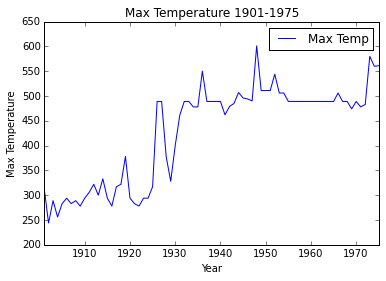

In [125]:
df.plot(x='Year', y='Max Temp', title= 'Max Temperature 1901-1975').set_ylabel("Max Temperature")

In [9]:
!ssh hng001@dsm1 'hadoop jar /usr/local/hadoop-2.6.0/share/hadoop/tools/lib/hadoop-streaming-2.6.0.jar \
-file max_temperature_map.py -mapper "python max_temperature_map.py" \
-file median_temp.py -reducer "python median_temp.py" \
-input /user/mas01cr/bda/2015-16/ncdc/19**.gz \
-output output3'
#this is the median temperature of all years in the ncdc folder

16/02/19 07:11:59 WARN streaming.StreamJob: -file option is deprecated, please use generic option -files instead.
packageJobJar: [max_temperature_map.py, median_temp.py, /tmp/hadoop-unjar8002463820523362310/] [] /tmp/streamjob4655423021614665502.jar tmpDir=null
16/02/19 07:12:00 INFO client.RMProxy: Connecting to ResourceManager at dsm1/158.223.50.51:8032
16/02/19 07:12:00 INFO client.RMProxy: Connecting to ResourceManager at dsm1/158.223.50.51:8032
16/02/19 07:12:01 INFO mapred.FileInputFormat: Total input paths to process : 66
16/02/19 07:12:01 INFO net.NetworkTopology: Adding a new node: /default-rack/158.223.50.51:50010
16/02/19 07:12:01 INFO net.NetworkTopology: Adding a new node: /default-rack/158.223.50.56:50010
16/02/19 07:12:01 INFO net.NetworkTopology: Adding a new node: /default-rack/158.223.50.52:50010
16/02/19 07:12:01 INFO net.NetworkTopology: Adding a new node: /default-rack/158.223.50.59:50010
16/02/19 07:12:01 INFO net.NetworkTopology: Adding a new node: /default-rack/

In [10]:
!ssh dsm1 'hadoop fs -cat output3/part-00000'
#median temperature of all years

1901	44
1902	22
1903	33
1904	33
1905	33
1906	33
1907	33
1908	22
1909	22
1910	28
1911	22
1912	17
1913	28
1914	28
1915	17
1916	22
1917	28
1918	39
1919	22
1920	39
1921	33
1922	28
1923	33
1924	39
1925	28
1926	44
1927	78
1928	72
1929	94
1930	106
1931	106
1932	94
1933	94
1934	94
1935	89
1936	89
1937	100
1938	111
1939	111
1940	122
1941	122
1942	146
1943	163
1944	174
1945	185
1946	163
1947	152
1948	133
1949	133
1951	133
1952	130
1953	133
1954	111
1955	113
1965	139
1966	139
1967	141
1968	139
1969	102
1970	100
1971	100
1972	149
1973	122
1974	120
1975	120


In [11]:
!ssh dsm1 'hadoop fs -cat output3/part-00000'> ./median_temp.tsv

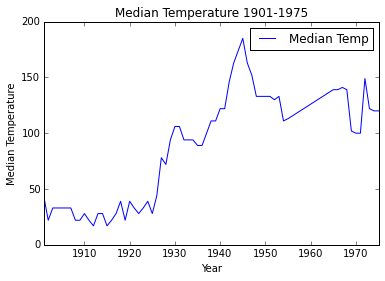

In [128]:
import csv
import matplotlib.pyplot as plt
import pandas
from pandas import DataFrame
%matplotlib inline
df = pandas.read_csv('median_temp.tsv', sep='\t',  names = ["Year", "Median Temp"])
df.plot(x='Year', y='Median Temp', title= 'Median Temperature 1901-1975').set_ylabel("Median Temperature")